# **Computer Vision in HealthCare Application**

## **LAB-1**

**Dataset used:** Skin Cancer HAM10000

**Link:** https://www.kaggle.com/surajghuwalewala/ham1000-segmentation-and-classification

### **Lab Description:** 
**Question 1**. Using OpenCV import a colour image and convert the same to its grey scale equivalent.

**Question 2**. Understand the impact of different types on noise in images (Gaussian, Salt & Pepper, Poisson, Spectacle) by introducing different types of noise to images. Identify different filters (Gaussian, Median, Mean and Weiner) that might suppress the different types of noise in images. 

---
Through experimentation, determine, which filter is best suited for suppressing each type of noise present in an image.

### Libraries

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.filters import median
from skimage import io,color, img_as_float, img_as_int
from scipy.signal.signaltools import wiener
from skimage.util import random_noise

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

### Original Image

Taken from HAM10000 skin cancer dataset. 

Has 7 diseases - melanoma, melanocytic nevi, basal cell carcinoma, Actinic keratoses, benign keratosis, dermatofibroma, vascular lesions

Shape of the image:  (450, 600, 3)


Text(0.5, 1.0, 'Melanoma Image with BGR')

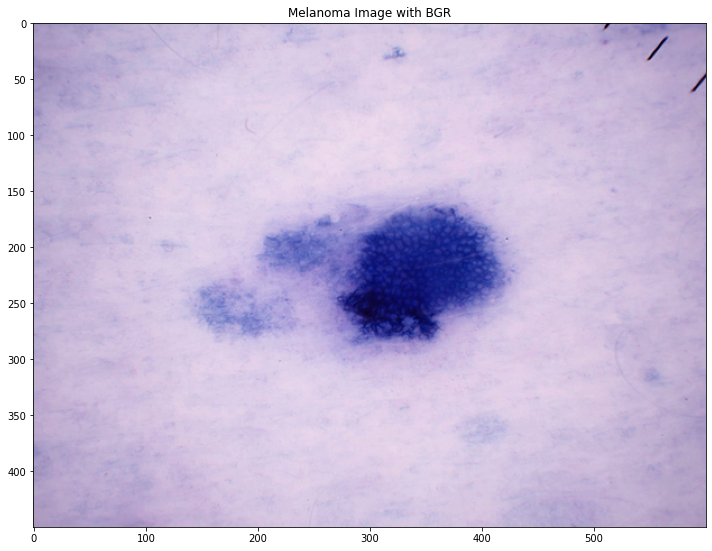

In [74]:
img = cv2.imread('D:\Datasets\HAM1000\images\ISIC_0024313.jpg')
print("Shape of the image: ",img.shape)
plt.imshow(img)
plt.title("Melanoma Image with BGR")

Text(0.5, 1.0, 'Image with RGB')

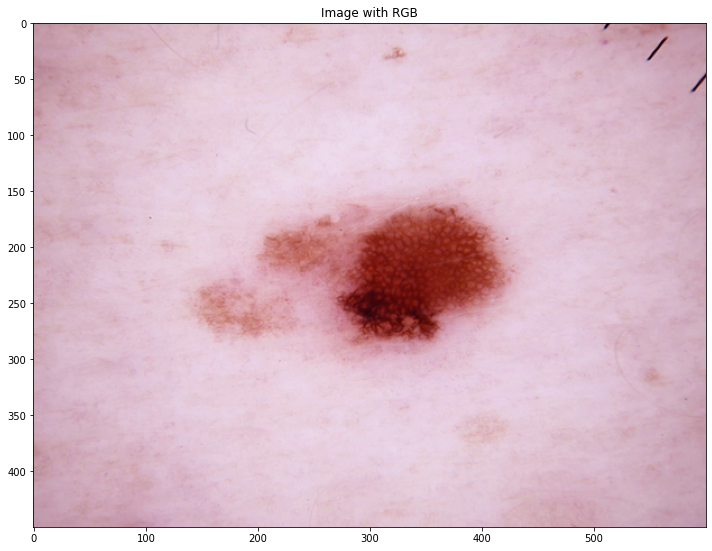

In [51]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with RGB")

Text(0.5, 1.0, 'GrayScale')

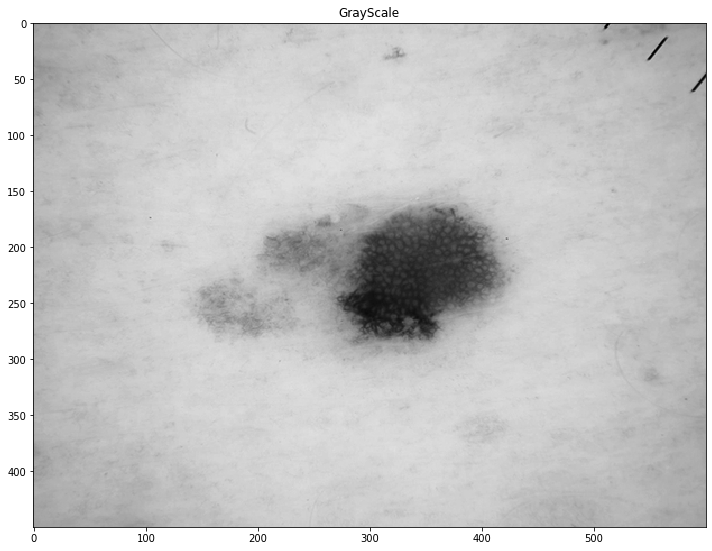

In [52]:
gray_img = io.imread('D:\Datasets\HAM1000\images\ISIC_0024313.jpg', as_gray=True)
io.imshow(gray_img)
plt.title("GrayScale")

### Apply noise - Poisson, Gaussian, Salt and Pepper, Speckle

In [6]:
i1 = random_noise(gray_img, mode='poisson')
i2 = random_noise(gray_img, mode='gaussian')
i3 = random_noise(gray_img, mode='s&p')
i4 = random_noise(gray_img, mode='speckle')

# cv2.imwrite("poisson_noise.jpg",i1)
# cv2.imwrite("gaussian_noise.jpg",i2)
# cv2.imwrite("salt_and_pepper_noise.jpg",i3)
# cv2.imwrite("speckle_noise.jpg",i4)

Text(0.5, 1.0, 'Gaussian Noise')

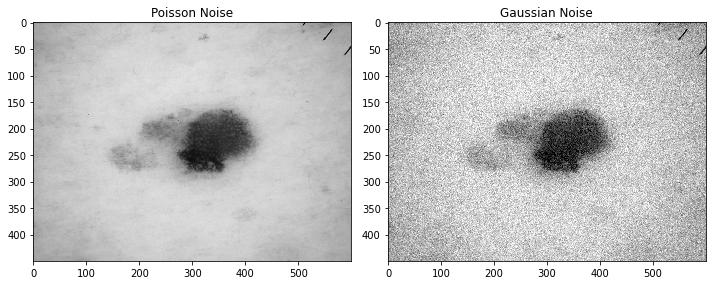

In [53]:
plt.subplot(1,2,1)
io.imshow(i1)
plt.title("Poisson Noise")

plt.subplot(1,2,2)
io.imshow(i2)
plt.title("Gaussian Noise")

Text(0.5, 1.0, 'Speckle Noise')

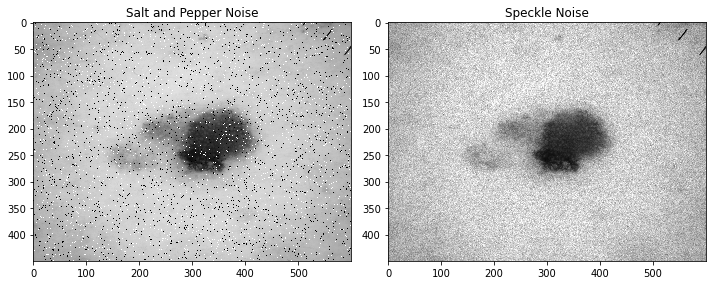

In [54]:
plt.subplot(1,2,1)
io.imshow(i3)
plt.title("Salt and Pepper Noise")

plt.subplot(1,2,2)
io.imshow(i4)
plt.title("Speckle Noise")

## Gaussian, Median, Mean and Weiner filters

### GAUSSIAN FILTER

5.832420922151514e-05
2.2893190306791135e-05


Text(0.5, 1.0, 'Gaussian filter on Gaussian noise')

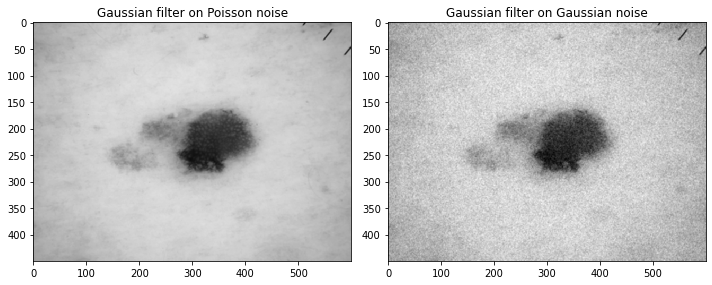

In [68]:
# GAUSSIAN
image = i1
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
print(mse(gray_img, gaussian_denoise))
plt.subplot(1,2,1)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Poisson noise")
plt.subplot(1,2,2)
image = i2
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Gaussian noise")

Text(0.5, 1.0, 'Gaussian filter on Speckle noise')

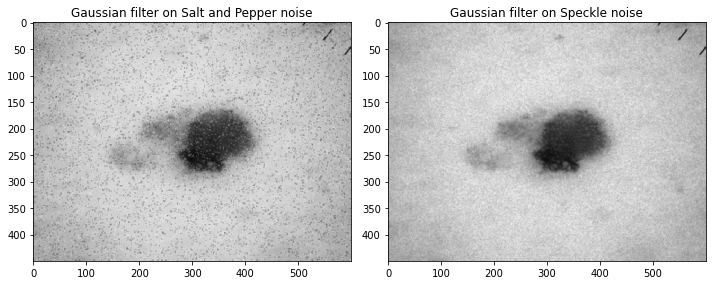

In [56]:
image = i3
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
plt.subplot(1,2,1)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Salt and Pepper noise")
plt.subplot(1,2,2)
image = i4
gaussian_denoise = cv2.GaussianBlur(image, (3,3),sigmaX=34,sigmaY=36)
io.imshow(gaussian_denoise)
plt.title("Gaussian filter on Speckle noise")

### Inference:

We can observe that Gaussian filter shows better results with Poisson Noise where we can see a noiseless image.

In the other images, there is still noise present. Although the image is not preserved at it's best in "Gaussian filter on Poisson noised" image, it is still better than others.

### MEDIAN FILTER

Text(0.5, 1.0, 'Median filter on Gaussian noise')

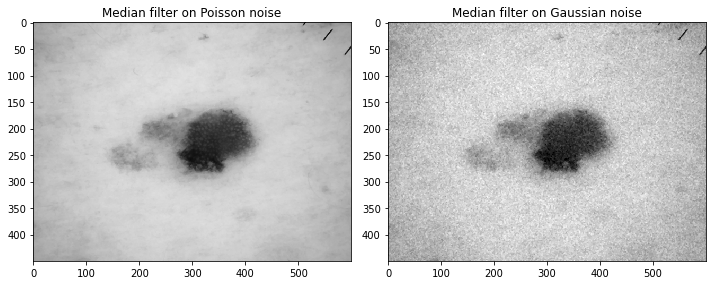

In [72]:
plt.subplot(1,2,1)
source = i1
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Poisson noise")
plt.subplot(1,2,2)
source = i2
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Gaussian noise")

Text(0.5, 1.0, 'Median filter on Speckle noise')

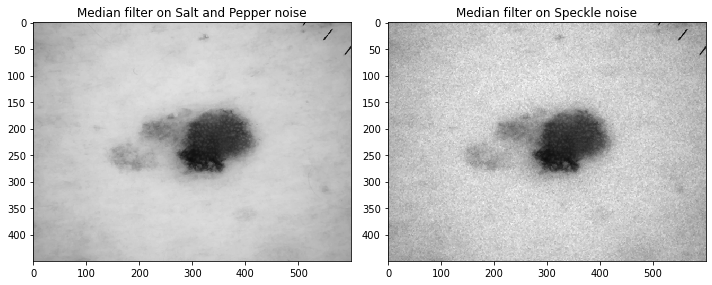

In [73]:
plt.subplot(1,2,1)
source = i3
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Salt and Pepper noise")
plt.subplot(1,2,2)
source = i4
source = np.float32(source)
final = cv2.medianBlur(source, 3)
io.imshow(final)
plt.title("Median filter on Speckle noise")

### Inference:

We can observe noise on Speckle and Gaussian noise images after filtering. Median filter performs good for Gaussian Noise and Salt and Pepper.

### MEAN FILTER

Text(0.5, 1.0, 'Mean filter on Gaussian noise')

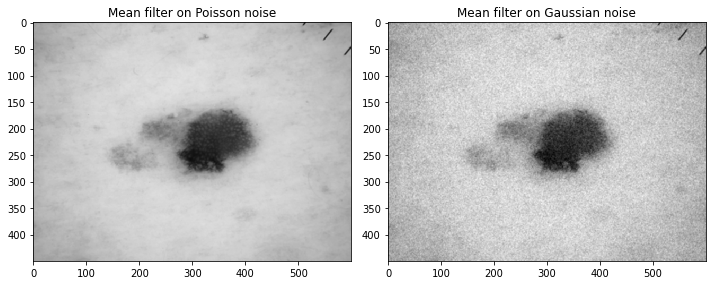

In [59]:
plt.subplot(1,2,1)
image = i1
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Poisson noise")
plt.subplot(1,2,2)
image = i2
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Gaussian noise")

Text(0.5, 1.0, 'Mean filter on Speckle noise')

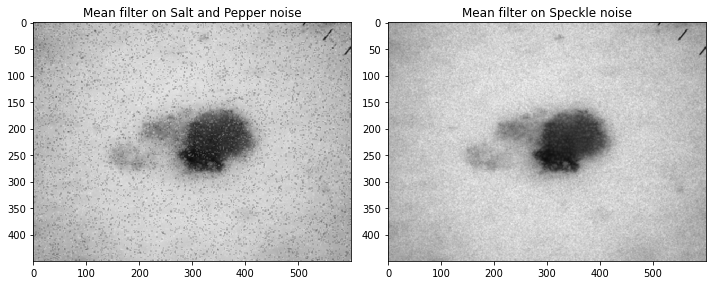

In [60]:
plt.subplot(1,2,1)
image = i3
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Salt and Pepper noise")
plt.subplot(1,2,2)
image = i4
mean_blur = cv2.blur(image, (3,3))
io.imshow(mean_blur)
plt.title("Mean filter on Speckle noise")

### Inference:

Noises are not observable in Gaussian Noised image after filtering with Mean filter. Other noised images still have noise even after filtering.

### WEINER FILTER

Text(0.5, 1.0, 'Weiner filter on Gaussian noise')

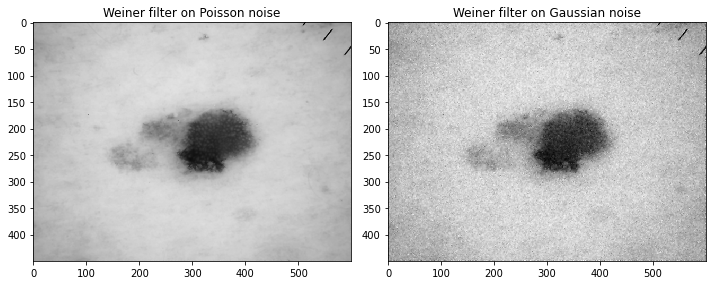

In [61]:
plt.subplot(1,2,1)
image = i1
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Poisson noise")
plt.subplot(1,2,2)
image = i2
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Gaussian noise")

Text(0.5, 1.0, 'Weiner filter on Speckle noise')

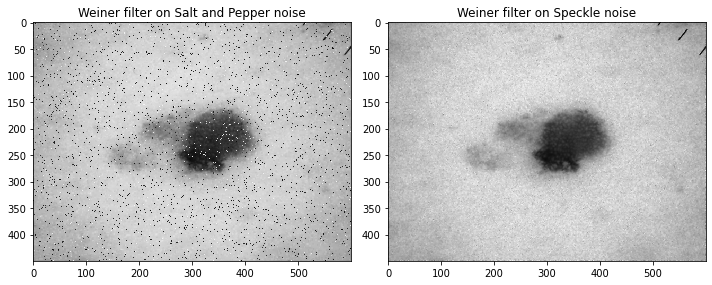

In [62]:
plt.subplot(1,2,1)
image = i3
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Salt and Pepper noise")
plt.subplot(1,2,2)
image = i4
filtered_img = wiener(image, (3,3))
io.imshow(filtered_img)
plt.title("Weiner filter on Speckle noise")

### Inference:

Weiner filter performs good for Gaussian noise and Speckle noise. In Salt and Pepper noised image, we still see the black and white spots unremoved.

## Conclusion:

Best filters for respective noises:

1. **Poisson Noise**: Gaussian, Median, Weiner


2. **Gaussian Noise**: Weiner 


3. **Salt and Pepper Noise**: Median


4. **Speckle Noise**: Weiner